<a href="https://colab.research.google.com/github/brex19/Tana-Lake-Evaporation-rate-and-volume-Prediction-using-LSTM-MODEL/blob/main/Pediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Installing  Tensorflow

In [ ]:
!pip install tensorflow==2.10.0

# Importing the necessary Libraries

In [ ]:
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from keras import Model, Sequential

from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.losses import MeanSquaredError
from keras.metrics import MeanAbsoluteError
from keras.metrics import RootMeanSquaredError


from keras.layers import Dense, Conv1D, LSTM, Lambda, Reshape, RNN, LSTMCell

import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.rcParams['figure.figsize'] = (20,16)
plt.rcParams['axes.grid'] = False

In [ ]:
print(tf.__version__)

2.10.0


In [ ]:
#random seed values for model reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
scaled_df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Evaporation/AI/scaled_df1.csv',
                index_col = 0)

### Train-Evaluation-Test Dataset Split

In [ ]:
from sklearn.model_selection import train_test_split
train_df, rem_df = train_test_split(scaled_df, train_size = 0.8, shuffle = False)
test_df = rem_df.iloc[:round(len(rem_df)*0.5)]
val_df = rem_df.iloc[round(len(rem_df)*0.5):]


In [ ]:
print(train_df.shape, val_df.shape, test_df.shape)

(326, 9) (41, 9) (41, 9)


# Display Train-Evaluation-Test Dataset

In [ ]:
scaled_df

,T2M,WS2M,T2M_MAX,T2M_MIN,WS2M_MAX,WS2M_MIN,Dwn_Rad,Erate,Evol
Date,,,,,,,,,
1985-01-01,0.423445,0.470293,0.633166,0.285215,0.515873,0.321839,0.526266,0.547656,0.596533
1985-02-01,0.454545,0.833702,0.613065,0.433062,0.753968,0.172414,0.609360,0.654066,0.528920
1985-03-01,0.662679,0.780259,0.726633,0.516880,0.771825,0.172414,0.697230,0.579947,0.627878
1985-04-01,0.525120,0.406162,0.632161,0.620489,0.311508,0.229885,0.789876,0.518649,0.502389
1985-05-01,0.476077,0.609244,0.586935,0.648428,0.601190,0.252874,0.506208,0.488391,0.522841
...,...,...,...,...,...,...,...,...,...
2018-08-01,0.157895,0.379441,0.113568,0.467986,0.613095,0.195402,0.240688,0.158326,0.181409
2018-09-01,0.398325,0.293933,0.285427,0.616997,0.498016,0.034483,0.528176,0.387112,0.387530
2018-10-01,0.387560,0.400818,0.319598,0.476135,0.277778,0.218391,0.421203,0.564423,0.635222


In [ ]:
train_df

,T2M,WS2M,T2M_MAX,T2M_MIN,WS2M_MAX,WS2M_MIN,Dwn_Rad,Erate,Evol
Date,,,,,,,,,
1985-01-01,0.423445,0.470293,0.633166,0.285215,0.515873,0.321839,0.526266,0.547656,0.596533
1985-02-01,0.454545,0.833702,0.613065,0.433062,0.753968,0.172414,0.609360,0.654066,0.528920
1985-03-01,0.662679,0.780259,0.726633,0.516880,0.771825,0.172414,0.697230,0.579947,0.627878
1985-04-01,0.525120,0.406162,0.632161,0.620489,0.311508,0.229885,0.789876,0.518649,0.502389
1985-05-01,0.476077,0.609244,0.586935,0.648428,0.601190,0.252874,0.506208,0.488391,0.522841
...,...,...,...,...,...,...,...,...,...
2011-10-01,0.413876,0.470293,0.366834,0.387660,0.253968,0.091954,0.642789,0.640739,0.725128
2011-11-01,0.324163,0.293933,0.375879,0.260768,0.428571,0.045977,0.414518,0.466828,0.471103
2011-12-01,0.331340,0.486326,0.415075,0.169965,0.529762,0.367816,0.471824,0.615336,0.690486


In [ ]:
val_df.head()

,T2M,WS2M,T2M_MAX,T2M_MIN,WS2M_MAX,WS2M_MIN,Dwn_Rad,Erate,Evol
Date,,,,,,,,,
2015-08-01,0.271531,0.277901,0.210050,0.556461,0.430556,0.126437,0.292264,0.331216,0.370632
2015-09-01,0.436603,0.277901,0.370854,0.649593,0.186508,0.068966,0.420248,0.424546,0.423208
2015-10-01,0.468900,0.475637,0.404020,0.601863,0.476190,0.310345,0.498567,0.614498,0.686087
2015-11-01,0.385167,0.480982,0.392965,0.443539,0.271825,0.252874,0.444126,0.533155,0.534877
2015-12-01,0.296651,0.491670,0.333668,0.394645,0.402778,0.149425,0.241643,0.420222,0.464767


In [ ]:
val_df.tail()

,T2M,WS2M,T2M_MAX,T2M_MIN,WS2M_MAX,WS2M_MIN,Dwn_Rad,Erate,Evol
Date,,,,,,,,,
2018-08-01,0.157895,0.379441,0.113568,0.467986,0.613095,0.195402,0.240688,0.158326,0.181409
2018-09-01,0.398325,0.293933,0.285427,0.616997,0.498016,0.034483,0.528176,0.387112,0.387530
2018-10-01,0.387560,0.400818,0.319598,0.476135,0.277778,0.218391,0.421203,0.564423,0.635222
2018-11-01,0.345694,0.368753,0.388945,0.286380,0.533730,0.160920,0.382999,0.503327,0.506824
2018-12-01,0.385167,0.432884,0.440201,0.401630,0.361111,0.126437,0.395415,0.461885,0.515026


In [ ]:
test_df.head()

,T2M,WS2M,T2M_MAX,T2M_MIN,WS2M_MAX,WS2M_MIN,Dwn_Rad,Erate,Evol
Date,,,,,,,,,
2012-03-01,0.739234,0.657342,0.881407,0.669383,0.809524,0.425287,0.805158,0.722721,0.790922
2012-04-01,0.777512,0.705440,0.845226,0.747381,0.672619,0.126437,0.944604,0.852068,0.859582
2012-05-01,0.751196,0.833702,0.845226,0.727590,0.565476,0.402299,0.675263,0.661149,0.708768
2012-06-01,0.502392,0.790948,0.786935,0.611176,0.763889,0.275862,0.366762,0.490629,0.470542
2012-07-01,0.151914,0.523736,0.193970,0.486612,0.484127,0.172414,0.136581,0.245922,0.257646


In [ ]:
test_df.tail()

,T2M,WS2M,T2M_MAX,T2M_MIN,WS2M_MAX,WS2M_MIN,Dwn_Rad,Erate,Evol
Date,,,,,,,,,
2015-03-01,0.781100,0.550457,0.806030,0.711292,0.581349,0.103448,0.773639,0.759664,0.825841
2015-04-01,0.879187,0.614588,0.826131,0.904540,0.720238,0.126437,0.846227,0.935327,0.942835
2015-05-01,0.705742,0.726817,0.813065,0.735739,0.710317,0.333333,0.535817,0.580053,0.615506
2015-06-01,0.520335,0.758882,0.755779,0.696158,0.660714,0.344828,0.421203,0.524184,0.502089
2015-07-01,0.370813,0.448916,0.375879,0.690338,0.349206,0.333333,0.503343,0.347843,0.366035


# Data Window Operation

In [ ]:
class DataWindow():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, val_df=val_df,
                 test_df=test_df, label_columns=None):

        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def split_to_inputs_labels(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:,:,self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def plot(self, model=None, plot_col='Erate', max_subplots=3):
        inputs, labels = self.sample_batch

        plt.figure(figsize=(24, 16))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))

        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [scaled]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
              label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
              label_col_index = plot_col_index

            if label_col_index is None:
              continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', marker='s', label='Labels', c='green', s=64)
            if model is not None:
              predictions = model(inputs)
              plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='red', s=64)

            if n == 0:
              plt.legend()

        plt.xlabel('Time (Month)')

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=False,
            batch_size=32
        )

        ds = ds.map(self.split_to_inputs_labels)
        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
      return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def sample_batch(self):
        result = getattr(self, '_sample_batch', None)
        if result is None:
            result = next(iter(self.train))
            self._sample_batch = result
        return result


# Training model

In [ ]:

def compile_and_fit(model, window, patience=10, max_epochs=200):
    early_stopping = EarlyStopping(monitor='loss',
                                   patience=patience,
                                   mode='min')
    model.compile(loss=MeanSquaredError(),
                  optimizer=Adam(),
                  metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'), "mae"])
    history = model.fit(window.train,
                        epochs=max_epochs,
                        validation_data=window.test,
                        callbacks=[early_stopping])
    return history


### Multi-step multi-output LSTM model

### **Parameters Tuning**





# Creating Data Window

In [ ]:
mo_wide_window = DataWindow(input_width=240, label_width=240, shift=1, label_columns=['Erate','Evol'])

In [ ]:
mo_lstm_model = Sequential([
    LSTM(120, return_sequences=True),
    LSTM(120, return_sequences=True),
    LSTM(120, return_sequences=True),
    Dense(units = 2)
])
history = compile_and_fit(mo_lstm_model, mo_wide_window)

Epoch 1/200
3/3 [==============================] - 11s 1s/step - loss: 0.1476 - rmse: 0.3841 - mae: 0.3217
Epoch 2/200
3/3 [==============================] - 3s 886ms/step - loss: 0.0675 - rmse: 0.2599 - mae: 0.2128
Epoch 3/200
3/3 [==============================] - 4s 956ms/step - loss: 0.0723 - rmse: 0.2690 - mae: 0.2291
Epoch 4/200
3/3 [==============================] - 3s 894ms/step - loss: 0.0591 - rmse: 0.2432 - mae: 0.1988
Epoch 5/200
3/3 [==============================] - 3s 912ms/step - loss: 0.0625 - rmse: 0.2499 - mae: 0.1938
Epoch 6/200
3/3 [==============================] - 3s 907ms/step - loss: 0.0576 - rmse: 0.2399 - mae: 0.1915
Epoch 7/200
3/3 [==============================] - 3s 891ms/step - loss: 0.0583 - rmse: 0.2414 - mae: 0.2019
Epoch 8/200
3/3 [==============================] - 3s 948ms/step - loss: 0.0579 - rmse: 0.2406 - mae: 0.2005
Epoch 9/200
3/3 [==============================] - 5s 1s/step - loss: 0.0559 - rmse: 0.2365 - mae: 0.1915
Epoch 10/200
3/3 [======

# convert model history to pandas dataframe

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df

,loss,rmse,mae
0,0.147557,0.384132,0.321722
1,0.067536,0.259877,0.212827
2,0.072345,0.268971,0.229132
3,0.059129,0.243165,0.198804
4,0.062460,0.249920,0.193827
...,...,...,...
195,0.004775,0.069102,0.048557
196,0.004846,0.069614,0.049482
197,0.004693,0.068504,0.048211
198,0.004676,0.068380,0.048451


In [ ]:
#save keras model to drive
mo_lstm_model.save('/content/drive/MyDrive/Colab Notebooks/Evaporation/models/LSTM-12.keras')

In [ ]:
# save model history as csv to drive:
hist_csv_file = '/content/drive/MyDrive/Colab Notebooks/Evaporation/models/LSTM-12.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
model_summary = mo_lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 240, 120)          62400     
                                                                 
 lstm_4 (LSTM)               (None, 240, 120)          115680    
                                                                 
 lstm_5 (LSTM)               (None, 240, 120)          115680    
                                                                 
 dense_1 (Dense)             (None, 240, 2)            242       
                                                                 
Total params: 294,002
Trainable params: 294,002
Non-trainable params: 0
_________________________________________________________________


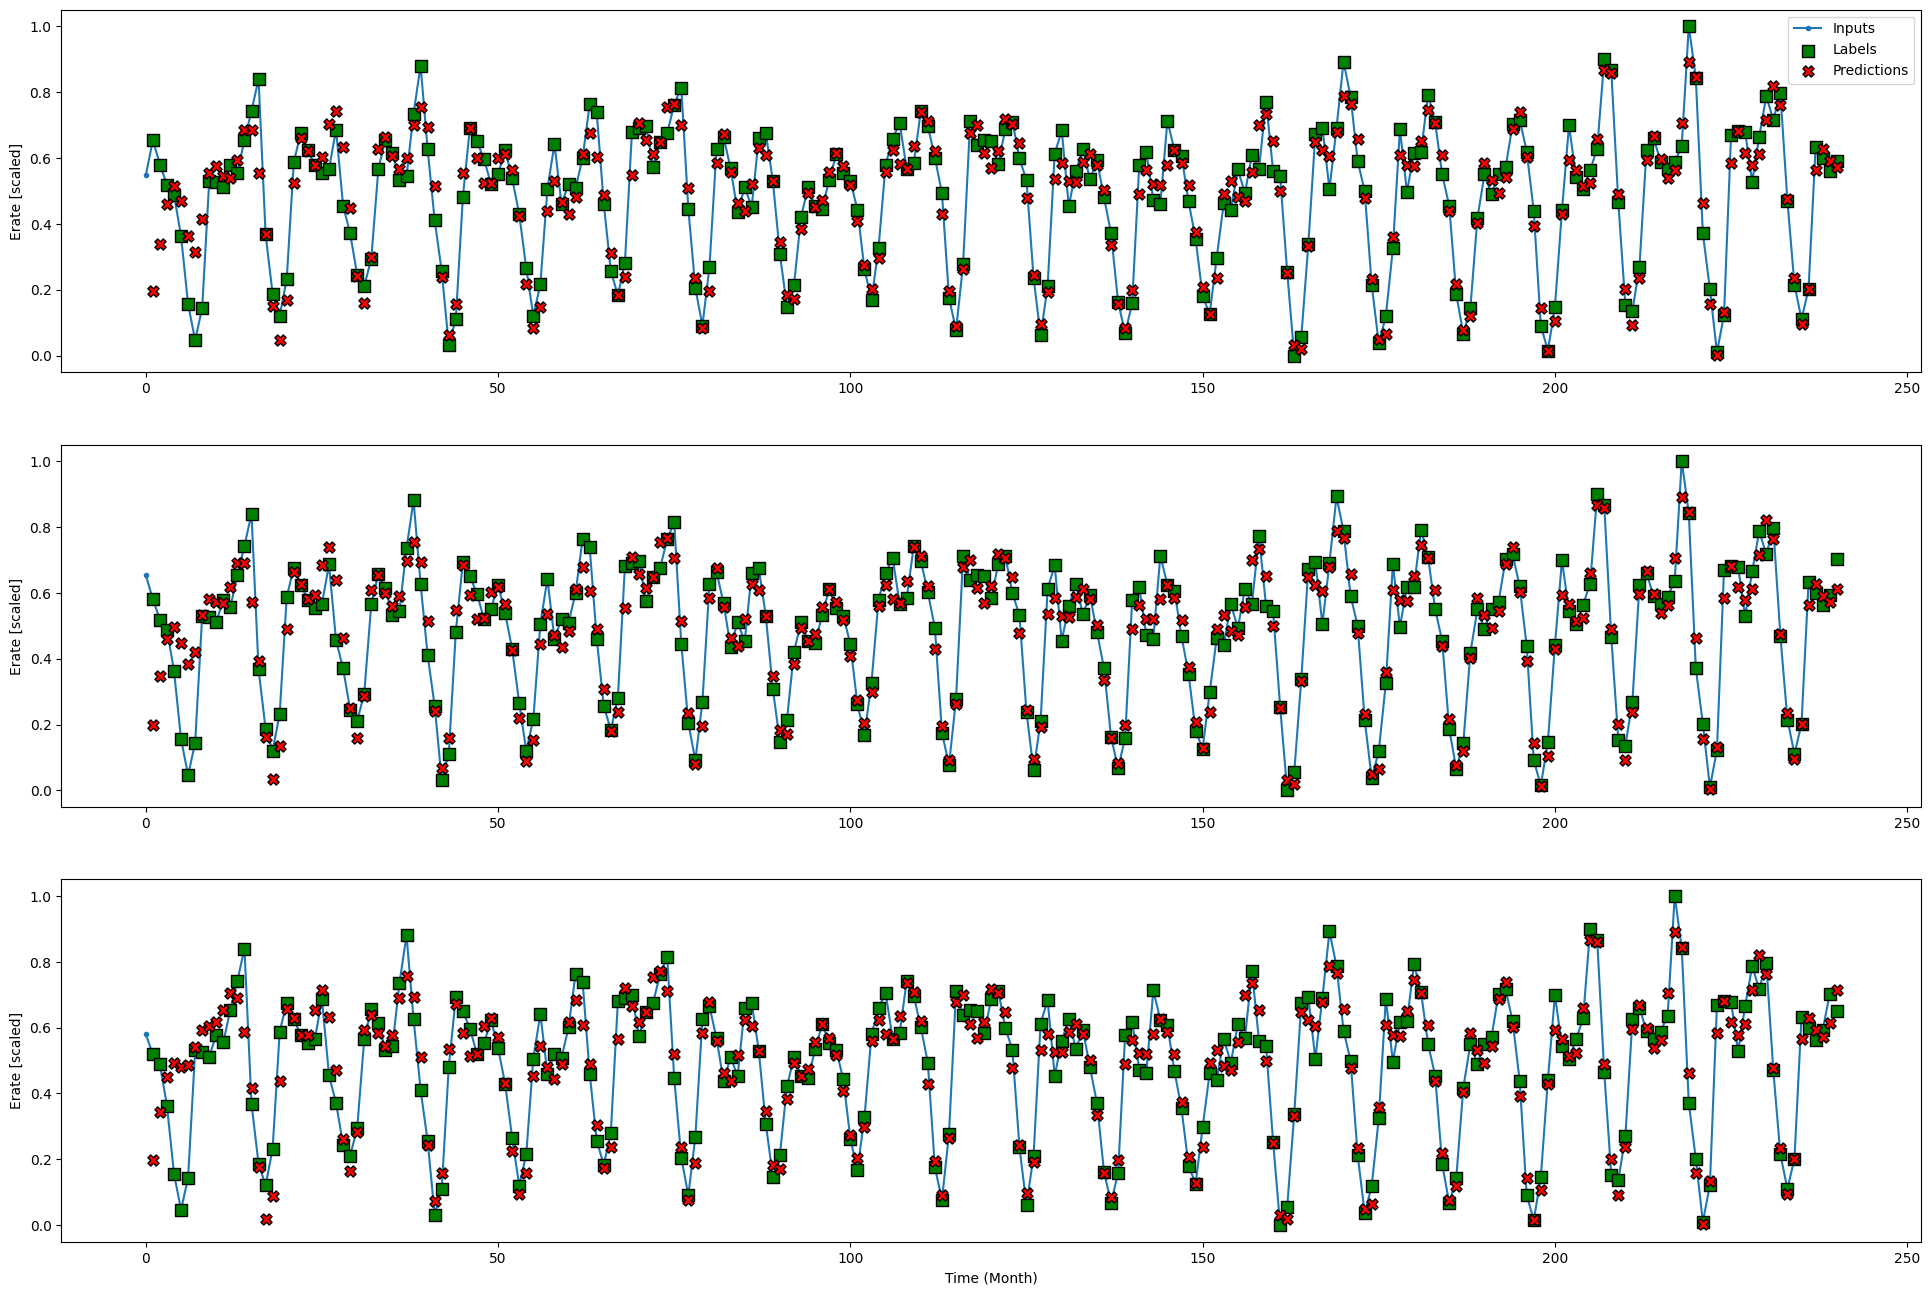

In [ ]:
mo_wide_window.plot(model=mo_lstm_model, plot_col='Erate')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Evaporation/plots/LSTM-plot-Erate-12.png', dpi=300)

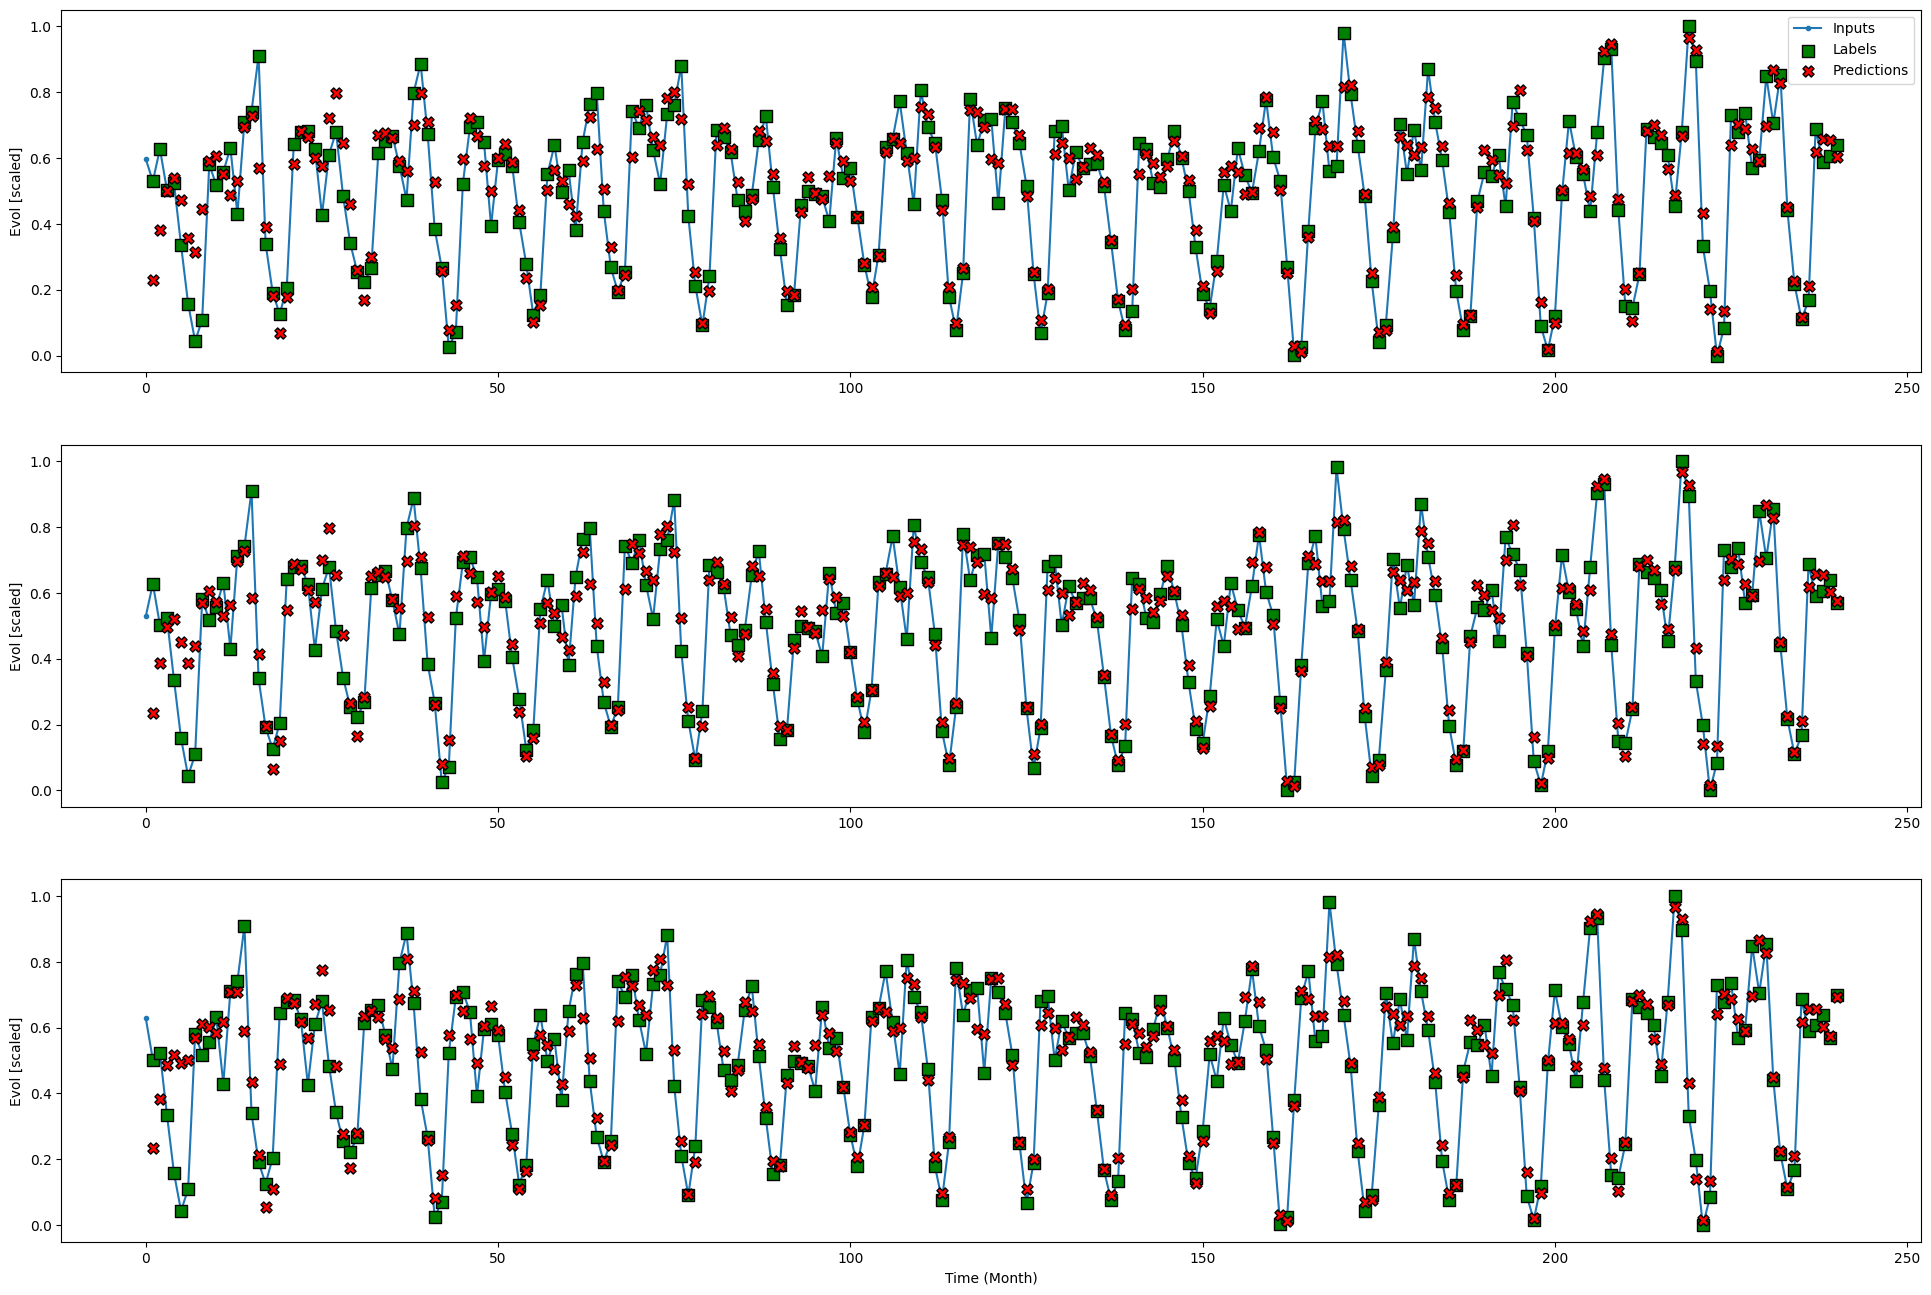

In [ ]:
mo_wide_window.plot(model=mo_lstm_model, plot_col='Evol')

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Evaporation/plots/LSTM-plot-Evol-13.png', dpi=300)

In [ ]:
#prediction_values = pd.DataFrame(data=mo_wide_window, index=test_df.index, columns=["Erate", "Evol"])
#prediction_values.to_csv("/content/drive/MyDrive/Colab Notebooks/prediction_values.csv")

In [ ]:
def predict(model_path, test_data):
    model = tf.keras.models.load_model(model_path)
    predictions = model.predict(test_data)
    return predictions

In [ ]:
# Define the parameters for the DataWindow
input_width = 24  # Specify the input width
label_width = 1  # Specify the label width
shift = 1  # Specify the shift value

In [ ]:
# Create the DataWindow object
window = DataWindow(input_width, label_width, shift, test_df=test_df)

In [ ]:
import numpy as np

# Get the desired subset of data
subset_data =train_df[:240].values

# Reshape the subset data to match the expected input shape
test_data = np.expand_dims(subset_data, axis=0)
# Call the predict function with the model path and reshaped test data
model_path = "/content/drive/MyDrive/Colab Notebooks/Evaporation/models/LSTM-12.keras"
prediction_values = predict(model_path,test_data)
print(predictions)

1/1 [==============================] - 1s 1s/step
[[[0.19492416 0.22895521]
  [0.34027925 0.3808246 ]
  [0.46124926 0.49966457]
  [0.5134788  0.5396489 ]
  [0.4679318  0.47298366]
  [0.36396948 0.3568641 ]
  [0.31329104 0.31532076]
  [0.41537336 0.4457019 ]
  [0.55583    0.5914366 ]
  [0.57655513 0.6051618 ]
  [0.54548687 0.55215394]
  [0.53857225 0.48834053]
  [0.5935563  0.52896124]
  [0.6849804  0.6949066 ]
  [0.68348086 0.726372  ]
  [0.5552455  0.570284  ]
  [0.36813805 0.39111874]
  [0.15062197 0.18122065]
  [0.04861189 0.06921764]
  [0.16899279 0.1783069 ]
  [0.52376115 0.5815072 ]
  [0.65931994 0.6825421 ]
  [0.6196036  0.6645155 ]
  [0.5785467  0.6010387 ]
  [0.60166997 0.57570803]
  [0.7023953  0.72171664]
  [0.742603   0.7986717 ]
  [0.63217133 0.645156  ]
  [0.44947502 0.46112046]
  [0.24174471 0.25930545]
  [0.15847719 0.16750672]
  [0.30049932 0.2987721 ]
  [0.627516   0.6681992 ]
  [0.66296524 0.675179  ]
  [0.60738176 0.6599541 ]
  [0.56702197 0.5903387 ]
  [0.59864235 

In [ ]:
# Reshape the prediction values to be 2-dimensional
prediction_values = prediction_values.reshape(-1, 2)
#save the predicted values
prediction_df = pd.DataFrame(prediction_values, columns=['Evol', 'Erate'])
prediction_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Evaporation/AI/20yearpredction.csv', index=False)

# Visualize prediction values

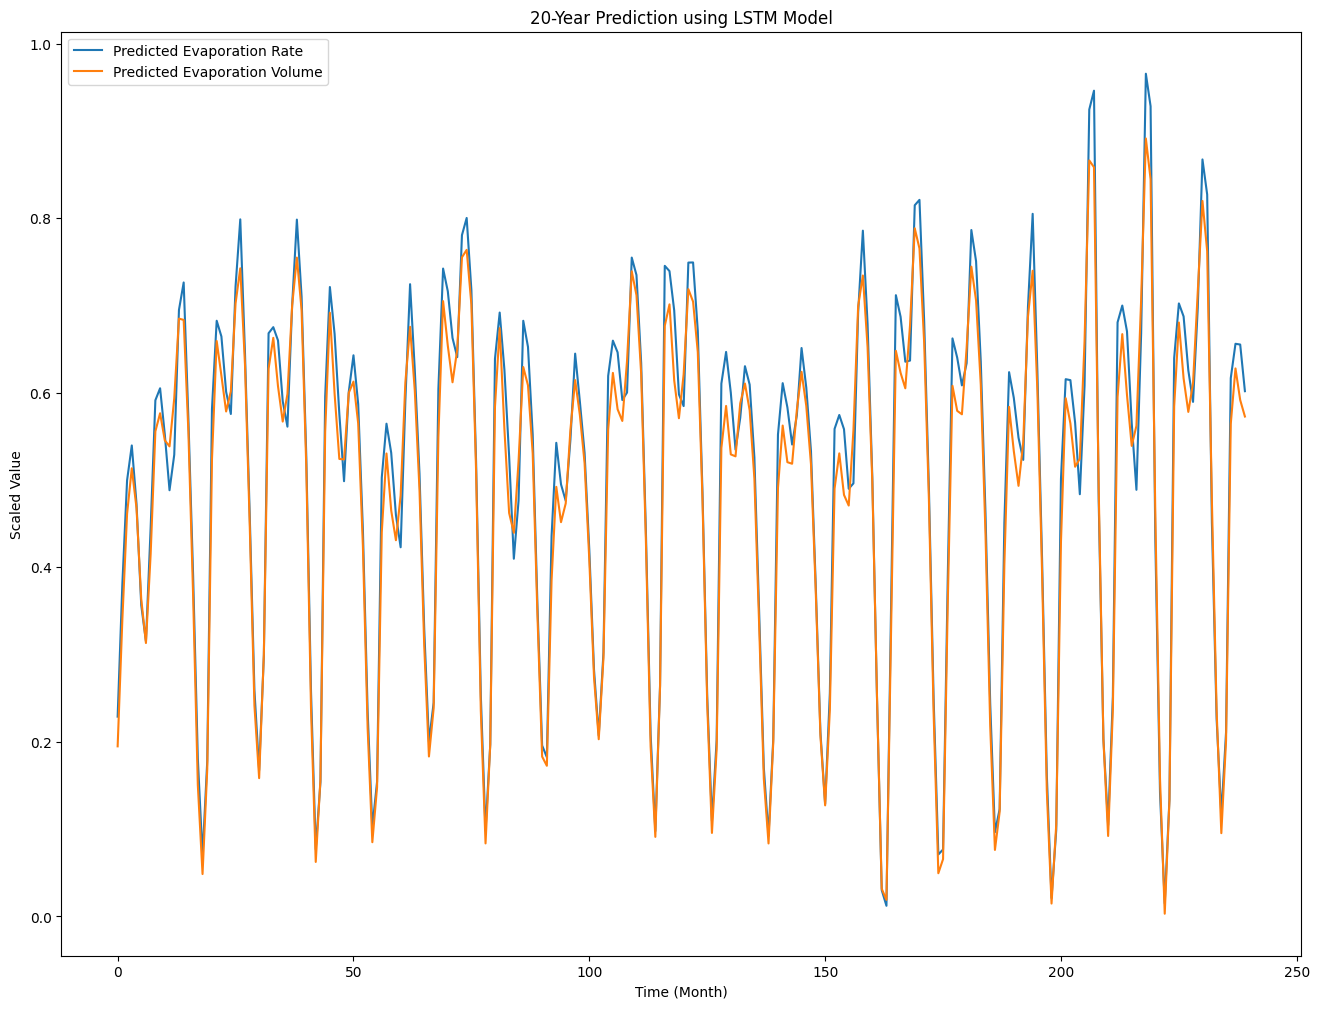

In [ ]:
plt.figure(figsize=(16, 12))
plt.plot(prediction_df['Erate'], label='Predicted Evaporation Rate')
plt.plot(prediction_df['Evol'], label='Predicted Evaporation Volume')
plt.xlabel('Time (Month)')
plt.ylabel('Scaled Value')
plt.title('20-Year Prediction using LSTM Model')
plt.legend()
plt.show()
